Importing packages 

In [9]:
import pandas as pd
import requests
import json
from pprint import pprint
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize
import seaborn as sns

Getting the data from LunarCrush

In [10]:
import urllib.request
url= "https://api.lunarcrush.com/v2?data=assets&key=8qkot9mjkwqie3higlypqs&symbol=XLM&data_points=720&interval=day&change=1d,2y"

Print the data 

In [11]:
print(urllib.request.urlopen(url).read())

b'{"config":{"change":"1d,2y","data":"assets","data_points":720,"interval":"day","symbol":"\'XLM\'"},"usage":{"day":4,"month":168},"data":[{"id":10,"name":"Stellar","symbol":"XLM","price":0.37303738,"price_btc":0.000007605230128565,"market_cap":8789117462,"percent_change_24h":-2.53,"percent_change_7d":-5.59,"percent_change_30d":41.07,"volume_24h":613597057.48,"max_supply":"50001802880","timeSeries":[{"asset_id":10,"time":1567382400,"open":0.065237,"close":0.06355,"high":0.065722,"low":0.062875,"volume":27871487,"market_cap":null,"url_shares":null,"unique_url_shares":null,"reddit_posts":5,"reddit_posts_score":62,"reddit_comments":109,"reddit_comments_score":60,"tweets":389,"tweet_spam":230,"tweet_followers":null,"tweet_quotes":null,"tweet_retweets":null,"tweet_replies":null,"tweet_favorites":null,"tweet_sentiment1":2,"tweet_sentiment2":13,"tweet_sentiment3":57,"tweet_sentiment4":101,"tweet_sentiment5":null,"tweet_sentiment_impact1":538,"tweet_sentiment_impact2":3485,"tweet_sentiment_imp

In [13]:
list(requests.get(url).json())

['config', 'usage', 'data']

In [15]:
lunar = []
for i in requests.get(url).json()['data']:
    lunar.append(i)

In [16]:
df = pd.DataFrame(lunar)
df

id     name symbol     price  price_btc  market_cap  percent_change_24h  \
0  10  Stellar    XLM  0.373109   0.000008  8790804897               -2.51   

   percent_change_7d  percent_change_30d    volume_24h  ...  \
0              -5.57               41.09  6.135971e+08  ...   

  market_dominance_1d market_dominance_1d_previous  \
0            0.389014                     0.412796   

   market_dominance_1d_percent_change  close_2y  close_2y_percent_change  \
0                           -3.090144  0.373109               441.310372   

   social_volume_global_2y  social_volume_global_2y_previous  \
0                364541652                            343160   

   market_dominance_2y  market_dominance_2y_previous  \
0             0.387751                          None   

   market_dominance_2y_percent_change  
0                                None  

[1 rows x 230 columns]

Sorting the data

In [19]:
df = pd.json_normalize(lunar, record_path='timeSeries')
df

asset_id        time      open     close      high       low  \
0          10  1567382400  0.065237  0.063550  0.065722  0.062875   
1          10  1567468800  0.064426  0.063139  0.064894  0.062625   
2          10  1567555200  0.062955  0.061828  0.063190  0.061113   
3          10  1567641600  0.061901  0.060520  0.062315  0.060178   
4          10  1567728000  0.059469  0.058177  0.059815  0.057610   
..        ...         ...       ...       ...       ...       ...   
715        10  1629158400  0.372214  0.343154  0.382659  0.340749   
716        10  1629244800  0.343272  0.342234  0.360113  0.326134   
717        10  1629331200  0.342303  0.367598  0.368934  0.334104   
718        10  1629417600  0.367208  0.384727  0.388439  0.361549   
719        10  1629504000  0.384885  0.373355  0.385025  0.368707   

           volume    market_cap  url_shares  unique_url_shares  ...  medium  \
0    2.787149e+07           NaN         NaN                NaN  ...     NaN   
1    3.071771e+07           NaN         NaN                NaN  ...     NaN   
2    2.879123e+07           NaN         NaN                NaN  ...     NaN   
3    3.036443e+07           NaN         NaN                NaN  ...     NaN   
4    3.315600e+07           NaN         NaN                NaN  ...     NaN   
..            ...           ...         ...                ...  ...     ...   
715  8.190952e+08  8.562939e+09       214.0              172.0  ...     NaN   
716  7.417912e+08  7.971621e+09       133.0              112.0  ...     NaN   
717  7.651065e+08  8.127554e+09       124.0              109.0  ...     NaN   
718  7.864723e+08  8.621176e+09       188.0              125.0  ...     NaN   
719  1.981781e+08  9.069428e+09       158.0              118.0  ...     NaN   

     youtube  social_contributors  social_volume  price_btc  \
0        NaN                 91.0            515   0.000006   
1        NaN                116.0            428   0.000006   
2        NaN                 95.0            316   0.000006   
3        NaN                111.0            366   0.000006   
4        NaN                110.0            351   0.000006   
..       ...                  ...            ...        ...   
715      NaN               1237.0           1211   0.000008   
716      NaN                681.0            985   0.000008   
717      NaN                  NaN            979   0.000008   
718      NaN                  NaN           1326   0.000008   
719      NaN                  NaN           1139   0.000008   

     social_volume_global  social_dominance  percent_change_24h  \
0                  120150          0.428631            1.813579   
1                  120085          0.356414           -0.646735   
2                  113061          0.279495           -2.076371   
3                  117822          0.310638           -2.115546   
4                   97221          0.361033           -3.871447   
..                    ...               ...                 ...   
715               1540749          0.078598           -7.846993   
716               1398855          0.070415           -0.267900   
717               1262615          0.077537            7.411150   
718               1413955          0.093780            4.659737   
719               1387544          0.082087           -2.510000   

     market_cap_global  market_dominance  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
..                 ...               ...  
715       2.061616e+12          0.415351  
716       2.083856e+12          0.382542  
717       2.182438e+12          0.372407  
718       2.266398e+12          0.380391  
719       2.267129e+12          0.400040  

[720 rows x 60 columns]

Converting data into csv file

In [21]:
df.to_csv('XLM_data.csv',  date_format='%Y-%m-%d')

In [22]:
df

asset_id        time      open     close      high       low  \
0          10  1567382400  0.065237  0.063550  0.065722  0.062875   
1          10  1567468800  0.064426  0.063139  0.064894  0.062625   
2          10  1567555200  0.062955  0.061828  0.063190  0.061113   
3          10  1567641600  0.061901  0.060520  0.062315  0.060178   
4          10  1567728000  0.059469  0.058177  0.059815  0.057610   
..        ...         ...       ...       ...       ...       ...   
715        10  1629158400  0.372214  0.343154  0.382659  0.340749   
716        10  1629244800  0.343272  0.342234  0.360113  0.326134   
717        10  1629331200  0.342303  0.367598  0.368934  0.334104   
718        10  1629417600  0.367208  0.384727  0.388439  0.361549   
719        10  1629504000  0.384885  0.373355  0.385025  0.368707   

           volume    market_cap  url_shares  unique_url_shares  ...  medium  \
0    2.787149e+07           NaN         NaN                NaN  ...     NaN   
1    3.071771e+07           NaN         NaN                NaN  ...     NaN   
2    2.879123e+07           NaN         NaN                NaN  ...     NaN   
3    3.036443e+07           NaN         NaN                NaN  ...     NaN   
4    3.315600e+07           NaN         NaN                NaN  ...     NaN   
..            ...           ...         ...                ...  ...     ...   
715  8.190952e+08  8.562939e+09       214.0              172.0  ...     NaN   
716  7.417912e+08  7.971621e+09       133.0              112.0  ...     NaN   
717  7.651065e+08  8.127554e+09       124.0              109.0  ...     NaN   
718  7.864723e+08  8.621176e+09       188.0              125.0  ...     NaN   
719  1.981781e+08  9.069428e+09       158.0              118.0  ...     NaN   

     youtube  social_contributors  social_volume  price_btc  \
0        NaN                 91.0            515   0.000006   
1        NaN                116.0            428   0.000006   
2        NaN                 95.0            316   0.000006   
3        NaN                111.0            366   0.000006   
4        NaN                110.0            351   0.000006   
..       ...                  ...            ...        ...   
715      NaN               1237.0           1211   0.000008   
716      NaN                681.0            985   0.000008   
717      NaN                  NaN            979   0.000008   
718      NaN                  NaN           1326   0.000008   
719      NaN                  NaN           1139   0.000008   

     social_volume_global  social_dominance  percent_change_24h  \
0                  120150          0.428631            1.813579   
1                  120085          0.356414           -0.646735   
2                  113061          0.279495           -2.076371   
3                  117822          0.310638           -2.115546   
4                   97221          0.361033           -3.871447   
..                    ...               ...                 ...   
715               1540749          0.078598           -7.846993   
716               1398855          0.070415           -0.267900   
717               1262615          0.077537            7.411150   
718               1413955          0.093780            4.659737   
719               1387544          0.082087           -2.510000   

     market_cap_global  market_dominance  
0                  NaN               NaN  
1                  NaN               NaN  
2                  NaN               NaN  
3                  NaN               NaN  
4                  NaN               NaN  
..                 ...               ...  
715       2.061616e+12          0.415351  
716       2.083856e+12          0.382542  
717       2.182438e+12          0.372407  
718       2.266398e+12          0.380391  
719       2.267129e+12          0.400040  

[720 rows x 60 columns]

Data Analysis

In [24]:
df = df[['time', 'open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 
         'social_volume', 'social_dominance', 'percent_change_24h', 'market_dominance']].copy()
df

time      open     close      high       low        volume  \
0    1567382400  0.065237  0.063550  0.065722  0.062875  2.787149e+07   
1    1567468800  0.064426  0.063139  0.064894  0.062625  3.071771e+07   
2    1567555200  0.062955  0.061828  0.063190  0.061113  2.879123e+07   
3    1567641600  0.061901  0.060520  0.062315  0.060178  3.036443e+07   
4    1567728000  0.059469  0.058177  0.059815  0.057610  3.315600e+07   
..          ...       ...       ...       ...       ...           ...   
715  1629158400  0.372214  0.343154  0.382659  0.340749  8.190952e+08   
716  1629244800  0.343272  0.342234  0.360113  0.326134  7.417912e+08   
717  1629331200  0.342303  0.367598  0.368934  0.334104  7.651065e+08   
718  1629417600  0.367208  0.384727  0.388439  0.361549  7.864723e+08   
719  1629504000  0.384885  0.373355  0.385025  0.368707  1.981781e+08   

     correlation_rank  social_score  volatility  social_volume  \
0                 NaN        385708    0.238515            515   
1                 NaN        384114    0.210314            428   
2                 NaN        263114    0.280027            316   
3                 NaN        262983    0.288516            366   
4                 NaN        100300    0.321049            351   
..                ...           ...         ...            ...   
715               2.1       2514534    0.029149           1211   
716               2.2       2117914    0.040114            985   
717               2.7       1374353    0.022865            979   
718               3.8       2388230    0.034752           1326   
719               3.7       3386257    0.030492           1139   

     social_dominance  percent_change_24h  market_dominance  
0            0.428631            1.813579               NaN  
1            0.356414           -0.646735               NaN  
2            0.279495           -2.076371               NaN  
3            0.310638           -2.115546               NaN  
4            0.361033           -3.871447               NaN  
..                ...                 ...               ...  
715          0.078598           -7.846993          0.415351  
716          0.070415           -0.267900          0.382542  
717          0.077537            7.411150          0.372407  
718          0.093780            4.659737          0.380391  
719          0.082087           -2.510000          0.400040  

[720 rows x 13 columns]

Cleaning the data 

In [25]:
df.isnull().sum()

time                  0
open                  0
close                 0
high                  0
low                   0
volume                0
correlation_rank      8
social_score          0
volatility            1
social_volume         0
social_dominance      0
percent_change_24h    0
market_dominance      9
dtype: int64

In [26]:
df.isnull()

time   open  close   high    low  volume  correlation_rank  \
0    False  False  False  False  False   False              True   
1    False  False  False  False  False   False              True   
2    False  False  False  False  False   False              True   
3    False  False  False  False  False   False              True   
4    False  False  False  False  False   False              True   
..     ...    ...    ...    ...    ...     ...               ...   
715  False  False  False  False  False   False             False   
716  False  False  False  False  False   False             False   
717  False  False  False  False  False   False             False   
718  False  False  False  False  False   False             False   
719  False  False  False  False  False   False             False   

     social_score  volatility  social_volume  social_dominance  \
0           False       False          False             False   
1           False       False          False             False   
2           False       False          False             False   
3           False       False          False             False   
4           False       False          False             False   
..            ...         ...            ...               ...   
715         False       False          False             False   
716         False       False          False             False   
717         False       False          False             False   
718         False       False          False             False   
719         False       False          False             False   

     percent_change_24h  market_dominance  
0                 False              True  
1                 False              True  
2                 False              True  
3                 False              True  
4                 False              True  
..                  ...               ...  
715               False             False  
716               False             False  
717               False             False  
718               False             False  
719               False             False  

[720 rows x 13 columns]

In [27]:
df.correlation_rank = df.correlation_rank.fillna(0)
df.volatility = df.volatility.fillna(0)
df.market_dominance = df.market_dominance.fillna(0)
df

time      open     close      high       low        volume  \
0    1567382400  0.065237  0.063550  0.065722  0.062875  2.787149e+07   
1    1567468800  0.064426  0.063139  0.064894  0.062625  3.071771e+07   
2    1567555200  0.062955  0.061828  0.063190  0.061113  2.879123e+07   
3    1567641600  0.061901  0.060520  0.062315  0.060178  3.036443e+07   
4    1567728000  0.059469  0.058177  0.059815  0.057610  3.315600e+07   
..          ...       ...       ...       ...       ...           ...   
715  1629158400  0.372214  0.343154  0.382659  0.340749  8.190952e+08   
716  1629244800  0.343272  0.342234  0.360113  0.326134  7.417912e+08   
717  1629331200  0.342303  0.367598  0.368934  0.334104  7.651065e+08   
718  1629417600  0.367208  0.384727  0.388439  0.361549  7.864723e+08   
719  1629504000  0.384885  0.373355  0.385025  0.368707  1.981781e+08   

     correlation_rank  social_score  volatility  social_volume  \
0                 0.0        385708    0.238515            515   
1                 0.0        384114    0.210314            428   
2                 0.0        263114    0.280027            316   
3                 0.0        262983    0.288516            366   
4                 0.0        100300    0.321049            351   
..                ...           ...         ...            ...   
715               2.1       2514534    0.029149           1211   
716               2.2       2117914    0.040114            985   
717               2.7       1374353    0.022865            979   
718               3.8       2388230    0.034752           1326   
719               3.7       3386257    0.030492           1139   

     social_dominance  percent_change_24h  market_dominance  
0            0.428631            1.813579          0.000000  
1            0.356414           -0.646735          0.000000  
2            0.279495           -2.076371          0.000000  
3            0.310638           -2.115546          0.000000  
4            0.361033           -3.871447          0.000000  
..                ...                 ...               ...  
715          0.078598           -7.846993          0.415351  
716          0.070415           -0.267900          0.382542  
717          0.077537            7.411150          0.372407  
718          0.093780            4.659737          0.380391  
719          0.082087           -2.510000          0.400040  

[720 rows x 13 columns]

In [28]:
df.isnull().sum()

time                  0
open                  0
close                 0
high                  0
low                   0
volume                0
correlation_rank      0
social_score          0
volatility            0
social_volume         0
social_dominance      0
percent_change_24h    0
market_dominance      0
dtype: int64

In [29]:
datetime_XLM = pd.to_datetime(df['time'], unit='s', errors='raise')
pd.DataFrame(datetime_XLM)

time
0   2019-09-02
1   2019-09-03
2   2019-09-04
3   2019-09-05
4   2019-09-06
..         ...
715 2021-08-17
716 2021-08-18
717 2021-08-19
718 2021-08-20
719 2021-08-21

[720 rows x 1 columns]

In [30]:
df.drop(['time'], axis=1, inplace=True)
df.head()

open     close      high       low      volume  correlation_rank  \
0  0.065237  0.063550  0.065722  0.062875  27871487.0               0.0   
1  0.064426  0.063139  0.064894  0.062625  30717707.0               0.0   
2  0.062955  0.061828  0.063190  0.061113  28791226.0               0.0   
3  0.061901  0.060520  0.062315  0.060178  30364433.0               0.0   
4  0.059469  0.058177  0.059815  0.057610  33156002.0               0.0   

   social_score  volatility  social_volume  social_dominance  \
0        385708    0.238515            515          0.428631   
1        384114    0.210314            428          0.356414   
2        263114    0.280027            316          0.279495   
3        262983    0.288516            366          0.310638   
4        100300    0.321049            351          0.361033   

   percent_change_24h  market_dominance  
0            1.813579               0.0  
1           -0.646735               0.0  
2           -2.076371               0.0  
3           -2.115546               0.0  
4           -3.871447               0.0

In [31]:
df = pd.merge(left=datetime_XLM, right=df, left_index = True, right_index=True)
df

time      open     close      high       low        volume  \
0   2019-09-02  0.065237  0.063550  0.065722  0.062875  2.787149e+07   
1   2019-09-03  0.064426  0.063139  0.064894  0.062625  3.071771e+07   
2   2019-09-04  0.062955  0.061828  0.063190  0.061113  2.879123e+07   
3   2019-09-05  0.061901  0.060520  0.062315  0.060178  3.036443e+07   
4   2019-09-06  0.059469  0.058177  0.059815  0.057610  3.315600e+07   
..         ...       ...       ...       ...       ...           ...   
715 2021-08-17  0.372214  0.343154  0.382659  0.340749  8.190952e+08   
716 2021-08-18  0.343272  0.342234  0.360113  0.326134  7.417912e+08   
717 2021-08-19  0.342303  0.367598  0.368934  0.334104  7.651065e+08   
718 2021-08-20  0.367208  0.384727  0.388439  0.361549  7.864723e+08   
719 2021-08-21  0.384885  0.373355  0.385025  0.368707  1.981781e+08   

     correlation_rank  social_score  volatility  social_volume  \
0                 0.0        385708    0.238515            515   
1                 0.0        384114    0.210314            428   
2                 0.0        263114    0.280027            316   
3                 0.0        262983    0.288516            366   
4                 0.0        100300    0.321049            351   
..                ...           ...         ...            ...   
715               2.1       2514534    0.029149           1211   
716               2.2       2117914    0.040114            985   
717               2.7       1374353    0.022865            979   
718               3.8       2388230    0.034752           1326   
719               3.7       3386257    0.030492           1139   

     social_dominance  percent_change_24h  market_dominance  
0            0.428631            1.813579          0.000000  
1            0.356414           -0.646735          0.000000  
2            0.279495           -2.076371          0.000000  
3            0.310638           -2.115546          0.000000  
4            0.361033           -3.871447          0.000000  
..                ...                 ...               ...  
715          0.078598           -7.846993          0.415351  
716          0.070415           -0.267900          0.382542  
717          0.077537            7.411150          0.372407  
718          0.093780            4.659737          0.380391  
719          0.082087           -2.510000          0.400040  

[720 rows x 13 columns]

In [32]:
df = df.rename({'time':'date'}, axis=1, inplace=False)
df.head()

date      open     close      high       low      volume  \
0 2019-09-02  0.065237  0.063550  0.065722  0.062875  27871487.0   
1 2019-09-03  0.064426  0.063139  0.064894  0.062625  30717707.0   
2 2019-09-04  0.062955  0.061828  0.063190  0.061113  28791226.0   
3 2019-09-05  0.061901  0.060520  0.062315  0.060178  30364433.0   
4 2019-09-06  0.059469  0.058177  0.059815  0.057610  33156002.0   

   correlation_rank  social_score  volatility  social_volume  \
0               0.0        385708    0.238515            515   
1               0.0        384114    0.210314            428   
2               0.0        263114    0.280027            316   
3               0.0        262983    0.288516            366   
4               0.0        100300    0.321049            351   

   social_dominance  percent_change_24h  market_dominance  
0          0.428631            1.813579               0.0  
1          0.356414           -0.646735               0.0  
2          0.279495           -2.076371               0.0  
3          0.310638           -2.115546               0.0  
4          0.361033           -3.871447               0.0

In [33]:
df = df.set_index('date')
df

open     close      high       low        volume  \
date                                                               
2019-09-02  0.065237  0.063550  0.065722  0.062875  2.787149e+07   
2019-09-03  0.064426  0.063139  0.064894  0.062625  3.071771e+07   
2019-09-04  0.062955  0.061828  0.063190  0.061113  2.879123e+07   
2019-09-05  0.061901  0.060520  0.062315  0.060178  3.036443e+07   
2019-09-06  0.059469  0.058177  0.059815  0.057610  3.315600e+07   
...              ...       ...       ...       ...           ...   
2021-08-17  0.372214  0.343154  0.382659  0.340749  8.190952e+08   
2021-08-18  0.343272  0.342234  0.360113  0.326134  7.417912e+08   
2021-08-19  0.342303  0.367598  0.368934  0.334104  7.651065e+08   
2021-08-20  0.367208  0.384727  0.388439  0.361549  7.864723e+08   
2021-08-21  0.384885  0.373355  0.385025  0.368707  1.981781e+08   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2019-09-02               0.0        385708    0.238515            515   
2019-09-03               0.0        384114    0.210314            428   
2019-09-04               0.0        263114    0.280027            316   
2019-09-05               0.0        262983    0.288516            366   
2019-09-06               0.0        100300    0.321049            351   
...                      ...           ...         ...            ...   
2021-08-17               2.1       2514534    0.029149           1211   
2021-08-18               2.2       2117914    0.040114            985   
2021-08-19               2.7       1374353    0.022865            979   
2021-08-20               3.8       2388230    0.034752           1326   
2021-08-21               3.7       3386257    0.030492           1139   

            social_dominance  percent_change_24h  market_dominance  
date                                                                
2019-09-02          0.428631            1.813579          0.000000  
2019-09-03          0.356414           -0.646735          0.000000  
2019-09-04          0.279495           -2.076371          0.000000  
2019-09-05          0.310638           -2.115546          0.000000  
2019-09-06          0.361033           -3.871447          0.000000  
...                      ...                 ...               ...  
2021-08-17          0.078598           -7.846993          0.415351  
2021-08-18          0.070415           -0.267900          0.382542  
2021-08-19          0.077537            7.411150          0.372407  
2021-08-20          0.093780            4.659737          0.380391  
2021-08-21          0.082087           -2.510000          0.400040  

[720 rows x 12 columns]

In [35]:
df['year'] = df.index.year
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df

open     close      high       low        volume  \
date                                                               
2019-09-02  0.065237  0.063550  0.065722  0.062875  2.787149e+07   
2019-09-03  0.064426  0.063139  0.064894  0.062625  3.071771e+07   
2019-09-04  0.062955  0.061828  0.063190  0.061113  2.879123e+07   
2019-09-05  0.061901  0.060520  0.062315  0.060178  3.036443e+07   
2019-09-06  0.059469  0.058177  0.059815  0.057610  3.315600e+07   
...              ...       ...       ...       ...           ...   
2021-08-17  0.372214  0.343154  0.382659  0.340749  8.190952e+08   
2021-08-18  0.343272  0.342234  0.360113  0.326134  7.417912e+08   
2021-08-19  0.342303  0.367598  0.368934  0.334104  7.651065e+08   
2021-08-20  0.367208  0.384727  0.388439  0.361549  7.864723e+08   
2021-08-21  0.384885  0.373355  0.385025  0.368707  1.981781e+08   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2019-09-02               0.0        385708    0.238515            515   
2019-09-03               0.0        384114    0.210314            428   
2019-09-04               0.0        263114    0.280027            316   
2019-09-05               0.0        262983    0.288516            366   
2019-09-06               0.0        100300    0.321049            351   
...                      ...           ...         ...            ...   
2021-08-17               2.1       2514534    0.029149           1211   
2021-08-18               2.2       2117914    0.040114            985   
2021-08-19               2.7       1374353    0.022865            979   
2021-08-20               3.8       2388230    0.034752           1326   
2021-08-21               3.7       3386257    0.030492           1139   

            social_dominance  percent_change_24h  market_dominance  year  \
date                                                                       
2019-09-02          0.428631            1.813579          0.000000  2019   
2019-09-03          0.356414           -0.646735          0.000000  2019   
2019-09-04          0.279495           -2.076371          0.000000  2019   
2019-09-05          0.310638           -2.115546          0.000000  2019   
2019-09-06          0.361033           -3.871447          0.000000  2019   
...                      ...                 ...               ...   ...   
2021-08-17          0.078598           -7.846993          0.415351  2021   
2021-08-18          0.070415           -0.267900          0.382542  2021   
2021-08-19          0.077537            7.411150          0.372407  2021   
2021-08-20          0.093780            4.659737          0.380391  2021   
2021-08-21          0.082087           -2.510000          0.400040  2021   

                month        day  
date                              
2019-09-02  September     Monday  
2019-09-03  September    Tuesday  
2019-09-04  September  Wednesday  
2019-09-05  September   Thursday  
2019-09-06  September     Friday  
...               ...        ...  
2021-08-17     August    Tuesday  
2021-08-18     August  Wednesday  
2021-08-19     August   Thursday  
2021-08-20     August     Friday  
2021-08-21     August   Saturday  

[720 rows x 15 columns]

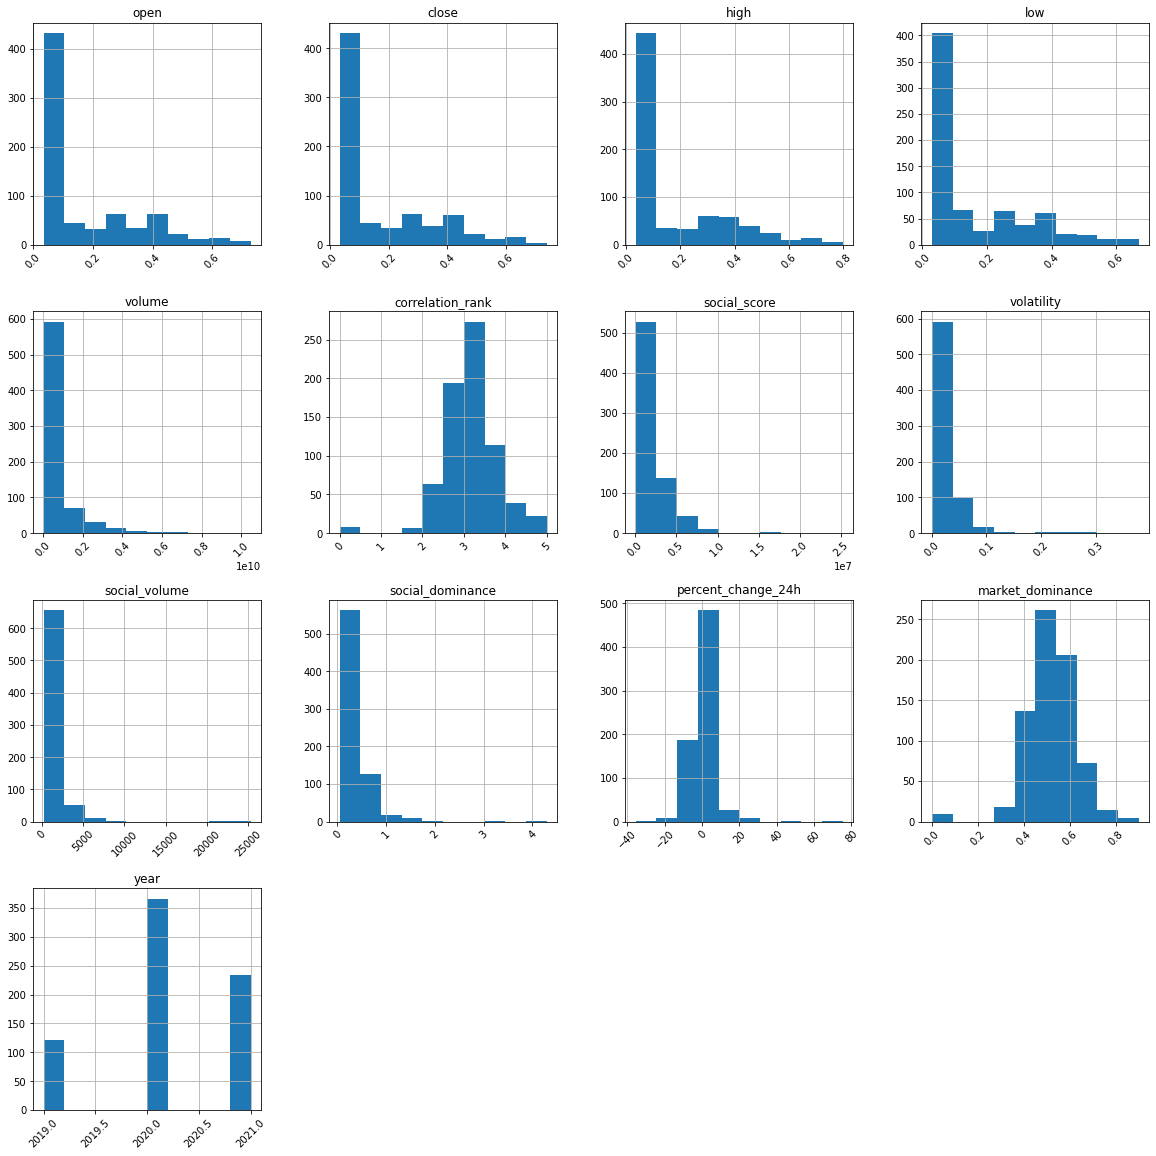

In [36]:
df.hist(figsize=(20,20), xrot=45)
plt.show()

Heatmap using Seaborn

In [37]:
XLM_corr = df.corr()
XLM_corr

open     close      high       low    volume  \
open                1.000000  0.993820  0.995827  0.994165  0.700827   
close               0.993820  1.000000  0.997291  0.996540  0.725188   
high                0.995827  0.997291  1.000000  0.993036  0.748739   
low                 0.994165  0.996540  0.993036  1.000000  0.689269   
volume              0.700827  0.725188  0.748739  0.689269  1.000000   
correlation_rank    0.051234  0.057053  0.067424  0.053891  0.222671   
social_score        0.422427  0.446013  0.464357  0.421370  0.682782   
volatility          0.135939  0.145419  0.161207  0.121827  0.339332   
social_volume       0.316344  0.338554  0.361415  0.312342  0.683109   
social_dominance   -0.189712 -0.171261 -0.153166 -0.193338  0.254566   
percent_change_24h -0.028261  0.055635  0.032514  0.017227  0.268120   
market_dominance    0.246737  0.233957  0.252096  0.224343  0.398949   
year                0.781762  0.783409  0.779882  0.784170  0.547886   

                    correlation_rank  social_score  volatility  social_volume  \
open                        0.051234      0.422427    0.135939       0.316344   
close                       0.057053      0.446013    0.145419       0.338554   
high                        0.067424      0.464357    0.161207       0.361415   
low                         0.053891      0.421370    0.121827       0.312342   
volume                      0.222671      0.682782    0.339332       0.683109   
correlation_rank            1.000000      0.191614   -0.241475       0.216583   
social_score                0.191614      1.000000    0.279655       0.756920   
volatility                 -0.241475      0.279655    1.000000       0.325868   
social_volume               0.216583      0.756920    0.325868       1.000000   
social_dominance            0.162427      0.464032    0.263002       0.742941   
percent_change_24h          0.119473      0.320083    0.155546       0.317777   
market_dominance            0.319371      0.248192   -0.230106       0.346529   
year                        0.075649      0.414574    0.028459       0.291616   

                    social_dominance  percent_change_24h  market_dominance  \
open                       -0.189712           -0.028261          0.246737   
close                      -0.171261            0.055635          0.233957   
high                       -0.153166            0.032514          0.252096   
low                        -0.193338            0.017227          0.224343   
volume                      0.254566            0.268120          0.398949   
correlation_rank            0.162427            0.119473          0.319371   
social_score                0.464032            0.320083          0.248192   
volatility                  0.263002            0.155546         -0.230106   
social_volume               0.742941            0.317777          0.346529   
social_dominance            1.000000            0.287053          0.337647   
percent_change_24h          0.287053            1.000000         -0.076309   
market_dominance            0.337647           -0.076309          1.000000   
year                       -0.221718            0.044656          0.060295   

                        year  
open                0.781762  
close               0.783409  
high                0.779882  
low                 0.784170  
volume              0.547886  
correlation_rank    0.075649  
social_score        0.414574  
volatility          0.028459  
social_volume       0.291616  
social_dominance   -0.221718  
percent_change_24h  0.044656  
market_dominance    0.060295  
year                1.000000

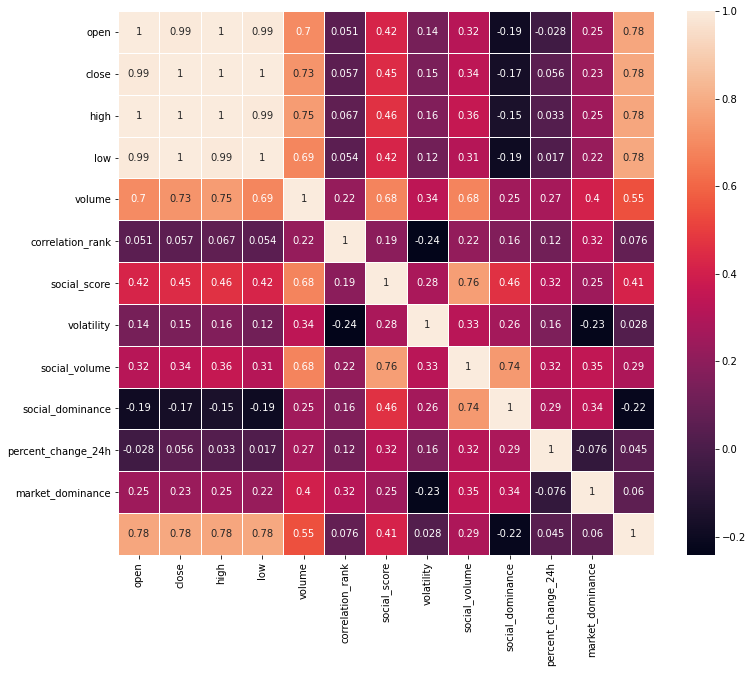

In [38]:
labels = ['open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 'social_volume', 'social_dominance','percent_change_24h', 'market_dominance']

plt.figure(figsize=(12,10))
sns.heatmap(XLM_corr,annot=True, linewidth=0.5, xticklabels=labels, yticklabels=labels)
plt.show()

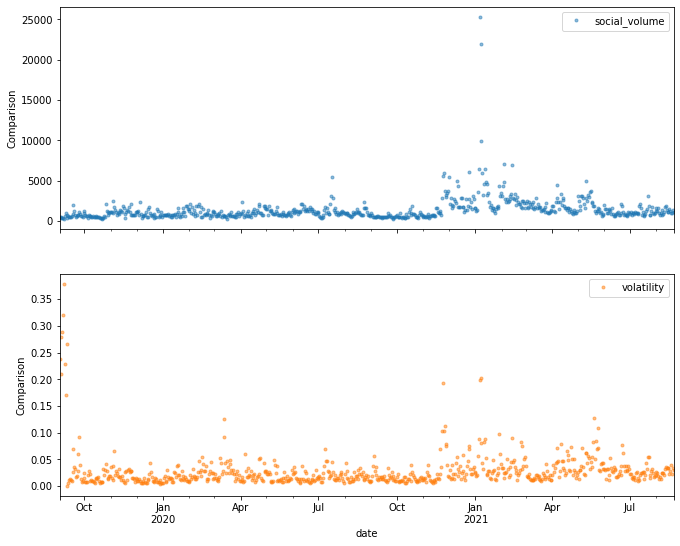

In [39]:
cols_plot = ['social_volume','volatility']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Comparison')

The two graphs look similar. Arguably this proves that the amount of times Stellar is spoken about on social media effects the volatility.

social score compared to social volume

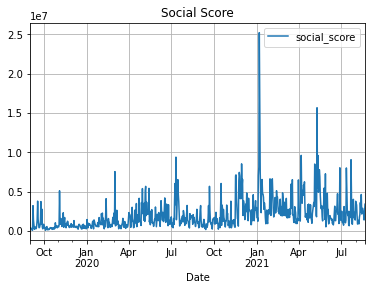

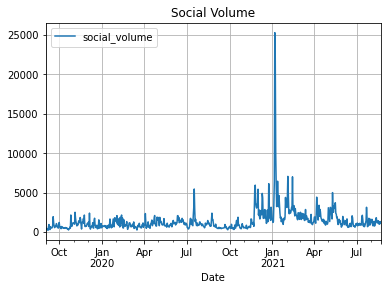

In [40]:
df[['social_score']].plot(linewidth=1.5);
plt.title('Social Score')
plt.xlabel('Date')

plt.grid()
plt.show()

df[['social_volume']].plot(linewidth=1.5);
plt.title('Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

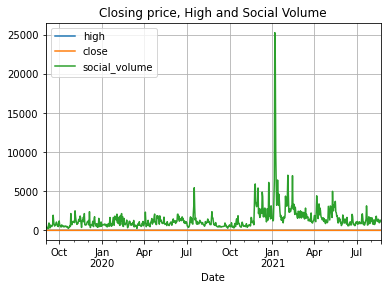

In [41]:
df[['high', 'close', 'social_volume']].plot(linewidth=1.5);
plt.title('Closing price, High and Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

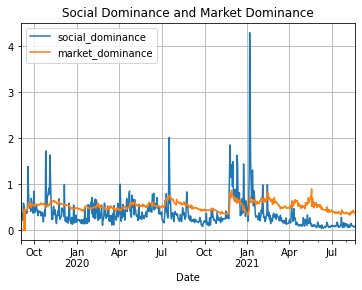

In [42]:
df[['social_dominance', 'market_dominance']].plot(linewidth=1.5);
plt.title('Social Dominance and Market Dominance')
plt.xlabel('Date')


plt.grid()
plt.show()

Around Jan 2021 there was a reddit post questioning the stablility of Stellar. Also questioning whether it was profitable. The overall consensus was no. This could be the reason why in Jan 2021 it has a high social dominance but the market dominance plummets.